# Adamczyk Dominik 

### Równania różniczkowe i różnicowe - projekt 1

#### Numeryczne rozwiązywanie równań różniczkowych zwyczajnych

Rozwiązać równanie x'=2x+e^t-t na przedziale [0, 1] dla x(0) = 1

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.integrate import odeint

In [2]:
# Warunek początkowy, przedział [a, b] na którym należy rozwiązać równanie i równanie
x0 = 1
a = 0
b = 1
def equation(x, t):
    return 2*x+math.e**t-t

In [3]:
t1 = list(np.linspace(a, b, 11)) 

In [4]:
# Równanie jest rozwiązywane dla różnych wartości h, więc otrzymywane jest więcej wyników, niż to konieczne. 
# Ta funkcja filtruje niepotrzebne wyniki i zostawia tylko 11, o których mowa w treści zadania.
def mapToOutputSet(t, solution): 
    out = []
    j = 0
    for i in range(len(solution[0])):
        if abs(solution[0][i] - t[j]) < 1e-9:
            j += 1
            out.append(solution[1][i])
    return out


In [5]:
exactSolution = list(odeint(equation, x0, t1)[:, 0]) # rozwiązanie dokładne

Algorytm rozwiązania równania metodą Eulera

In [6]:
def eulerMethod(f, x0, a, b, h = 0.1):
    t = list(np.linspace(a, b, int((b - a) / h)+1))
    x = [x0 for _ in range(int((b - a)/h)+1)]
    for i in range (len(x) - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i])
    
    return t, x


Algorytm rozwiązania równania metodą Eulera z punktem środkowym

In [7]:
def eulerMidPointMethod(f, x0, a, b, h = 0.1):
    t = list(np.linspace(a, b, int((b - a) / h)+1))
    x = [x0 for _ in range(int((b - a)/h)+1)]
    for i in range(len(t) - 1):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i])
        k2 = f(x[i] + k1 * h / 2, t[i] + h / 2)
        x[i+1] = x[i] + k2*h
    return t, x


Funkcje potrzebne do metody Taylora rzędu trzeciego

In [8]:
from sympy import *
x = Symbol('x')
t = Symbol('t')
def f(t, x):
    return equation(x, t)

def ft(t, x):
    return diff(f(t, x), t)

def fx(t, x):
    return diff(f(t, x), x)

def ftx(t, x):
    return diff(f(t,x), t, 1, x, 1)

def ftt(t, x):
    return diff(f(t, x), t, 2)

def fxx(t, x):
    return diff(f(t, x), x, 2)

def F1(t, x):
    return ft(t,x) + f(t,x) * fx(t, x)

def F2(t, x):
    return ftt(t, x) + 2 * f(t,x) * ftx(t, x) + ft(t,x) * fx(t,x) \
        + f(t, x) * (fx(t,x))**2 + (f(t, x))**2 * fxx(t, x)

In [9]:
F1(t, x)

3.0*2.71828182845905**t - 2*t + 4*x - 1

In [10]:
F2(t, x)

7.0*2.71828182845905**t - 4*t + 8*x - 2

Algorytm rozwiązywania równania metodą Taylora rzędu trzeciego

In [11]:
def F1(x, t):
    return 3*(math.e)**t - 2 * t + 4 * x - 1

def F2(x, t):
    return 7 * (math.e)**t - 4 * t + 8 * x - 2

def taylorMethod(f, f1, f2, x0, a, b, h=0.1):
    t = list(np.linspace(a, b, int((b - a) / h)+1))
    x = [x0 for _ in range(int((b - a)/h)+1)]
    for i in range(len(t) - 1):
        h = t[i+1] - t[i]
        k = f(x[i], t[i])
        k1 = f1(x[i], t[i])
        k2 = f2(x[i], t[i])
        x[i+1] = x[i] + k * h + 1/2 * k1 * h ** 2 + 1/ 6 * k2 * h **3
    return t, x

Algorytm rozwiązania równania metodą Runge-Knutty'ego rzędu czwartego

In [12]:
def rungeKuttaMethod(f, x0, a, b, h = 0.1):
    t = list(np.linspace(a, b, int((b - a) / h)+1))
    x = [x0 for _ in range(int((b - a)/h)+1)]
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = f(x[i], t[i])
        k2 = f(x[i] + k1 * h / 2, t[i] + h/2)
        k3 = f(x[i] + k2 * h / 2, t[i] + h/2)
        k4 = f(x[i] + k3 * h, t[i] + h)
        x[i+1] = x[i] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, x


In [13]:
eulerH01 = mapToOutputSet(t1, eulerMethod(equation, x0, a, b, 0.1))
eulerH005 = mapToOutputSet(t1, eulerMethod(equation, x0, a, b, 0.05))
eulerH001 = mapToOutputSet(t1, eulerMethod(equation, x0, a, b, 0.01))

midPointH01 = mapToOutputSet(t1, eulerMidPointMethod(equation, x0, a, b, 0.1))
midPointH005 = mapToOutputSet(t1, eulerMidPointMethod(equation, x0, a, b, 0.05))
midPointH001 = mapToOutputSet(t1, eulerMidPointMethod(equation, x0, a, b, 0.01))

taylorH01 = mapToOutputSet(t1, taylorMethod(equation, F1, F2, x0, a, b, 0.1))
taylorH005 = mapToOutputSet(t1, taylorMethod(equation, F1, F2, x0, a, b, 0.05))
taylorH001 = mapToOutputSet(t1, taylorMethod(equation, F1, F2, x0, a, b, 0.01))

rungeH01 = mapToOutputSet(t1, rungeKuttaMethod(equation, x0, a, b, 0.1))
rungeH005 = mapToOutputSet(t1, rungeKuttaMethod(equation, x0, a, b, 0.05))
rungeH001 = mapToOutputSet(t1, rungeKuttaMethod(equation, x0, a, b, 0.01))


Porównanie rozwiązań równania różnymi metodami dla tych samych wartości h

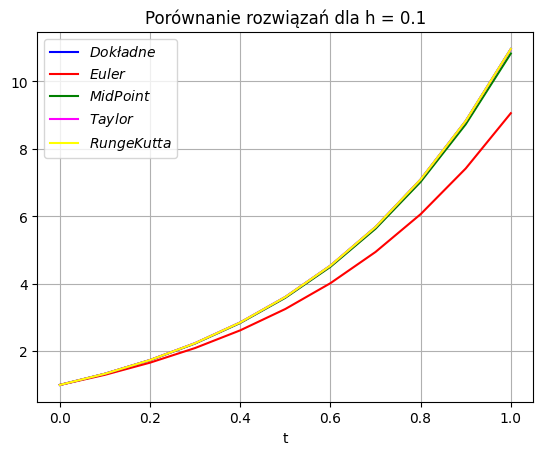

In [14]:
plt.plot(t1, exactSolution, 'blue', label=r'$Dokładne$')
plt.plot(t1, eulerH01, 'red', label=r'$Euler$')
plt.plot(t1, midPointH01, 'green', label=r'$MidPoint$')
plt.plot(t1, taylorH01, 'magenta', label=r'$Taylor$')
plt.plot(t1, rungeH01, 'yellow', label=r'$RungeKutta$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Porównanie rozwiązań dla h = 0.1')
plt.grid()
plt.show()

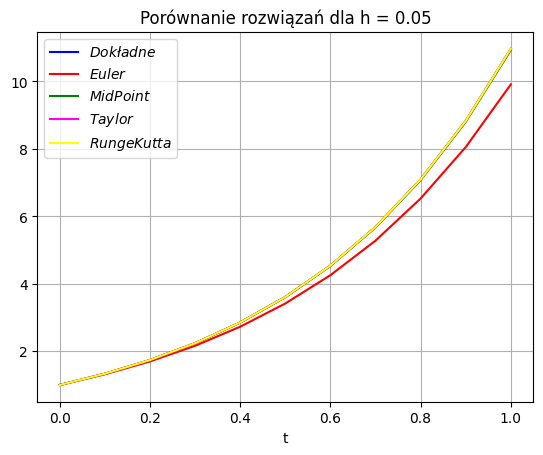

In [15]:
plt.plot(t1, exactSolution, 'blue', label=r'$Dokładne$')
plt.plot(t1, eulerH005, 'red', label=r'$Euler$')
plt.plot(t1, midPointH005, 'green', label=r'$MidPoint$')
plt.plot(t1, taylorH005, 'magenta', label=r'$Taylor$')
plt.plot(t1, rungeH005, 'yellow', label=r'$RungeKutta$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Porównanie rozwiązań dla h = 0.05')
plt.grid()
plt.show()

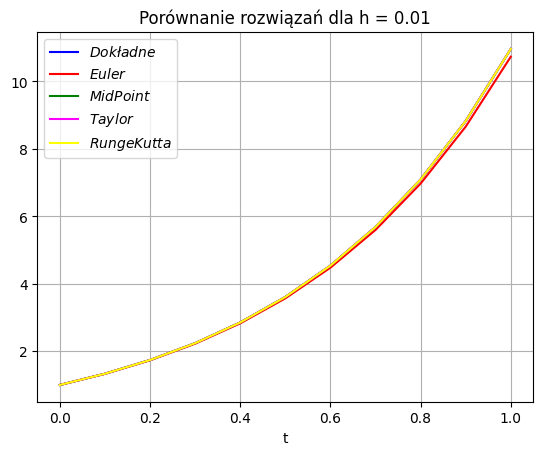

In [16]:
plt.plot(t1, exactSolution, 'blue', label=r'$Dokładne$')
plt.plot(t1, eulerH001, 'red', label=r'$Euler$')
plt.plot(t1, midPointH001, 'green', label=r'$MidPoint$')
plt.plot(t1, taylorH001, 'magenta', label=r'$Taylor$')
plt.plot(t1, rungeH001, 'yellow', label=r'$RungeKutta$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Porównanie rozwiązań dla h = 0.01')
plt.grid()
plt.show()

Porównanie rozwiązań równania tymi samymi metodami, dla różnych wartości h

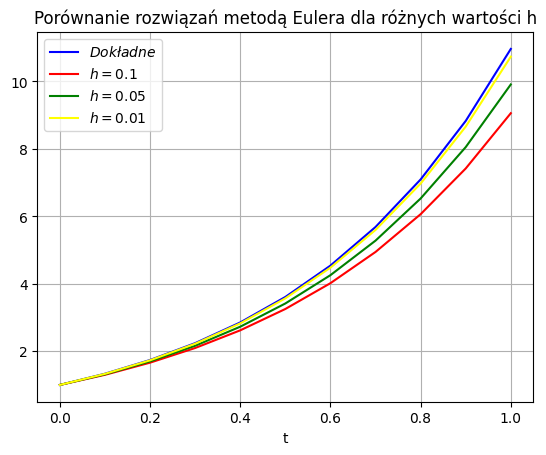

In [17]:
plt.plot(t1, exactSolution, 'blue', label=r'$Dokładne$')
plt.plot(t1, eulerH01, 'red', label=r'$h=0.1$')
plt.plot(t1, eulerH005, 'green', label=r'$h=0.05$')
plt.plot(t1, eulerH001, 'yellow', label=r'$h=0.01$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Porównanie rozwiązań metodą Eulera dla różnych wartości h')
plt.grid()
plt.show()

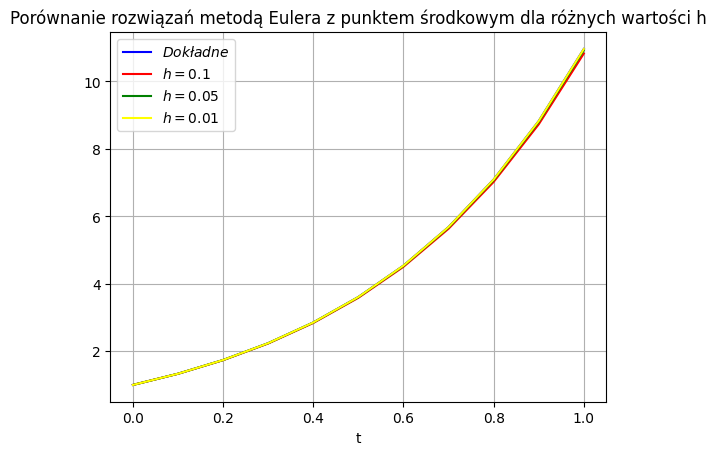

In [18]:
plt.plot(t1, exactSolution, 'blue', label=r'$Dokładne$')
plt.plot(t1, midPointH01, 'red', label=r'$h=0.1$')
plt.plot(t1, midPointH005, 'green', label=r'$h=0.05$')
plt.plot(t1, midPointH001, 'yellow', label=r'$h=0.01$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Porównanie rozwiązań metodą Eulera z punktem środkowym dla różnych wartości h')
plt.grid()
plt.show()

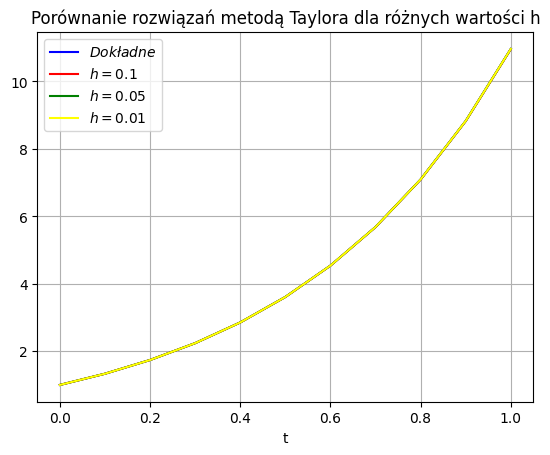

In [19]:
plt.plot(t1, exactSolution, 'blue', label=r'$Dokładne$')
plt.plot(t1, taylorH01, 'red', label=r'$h=0.1$')
plt.plot(t1, taylorH005, 'green', label=r'$h=0.05$')
plt.plot(t1, taylorH001, 'yellow', label=r'$h=0.01$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Porównanie rozwiązań metodą Taylora dla różnych wartości h')
plt.grid()
plt.show()

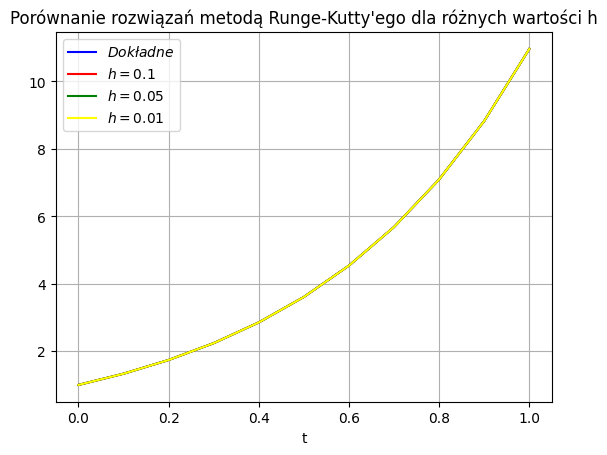

In [20]:
plt.plot(t1, exactSolution, 'blue', label=r'$Dokładne$')
plt.plot(t1, rungeH01, 'red', label=r'$h=0.1$')
plt.plot(t1, rungeH005, 'green', label=r'$h=0.05$')
plt.plot(t1, rungeH001, 'yellow', label=r'$h=0.01$')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Porównanie rozwiązań metodą Runge-Kutty\'ego dla różnych wartości h')
plt.grid()
plt.show()

In [21]:
epsEulerH01Err = [abs(exactSolution[i] - eulerH01[i]) for i in range(len(exactSolution))]
epsEulerH005Err = [abs(exactSolution[i] - eulerH005[i]) for i in range(len(exactSolution))]
epsEulerH001Err = [abs(exactSolution[i] - eulerH001[i]) for i in range(len(exactSolution))]

epsMidPointH01Err = [abs(exactSolution[i] - midPointH01[i]) for i in range(len(exactSolution))]
epsMidPointH005Err = [abs(exactSolution[i] - midPointH005[i]) for i in range(len(exactSolution))]
epsMidPointH001Err = [abs(exactSolution[i] - midPointH001[i]) for i in range(len(exactSolution))]

epsTaylorH01Err = [abs(exactSolution[i] - taylorH01[i]) for i in range(len(exactSolution))]
epsTaylorH005Err = [abs(exactSolution[i] - taylorH005[i]) for i in range(len(exactSolution))]
epsTaylorH001Err = [abs(exactSolution[i] - taylorH001[i]) for i in range(len(exactSolution))]

epsrungeH01Err = [abs(exactSolution[i] - rungeH01[i]) for i in range(len(exactSolution))]
epsrungeH005Err = [abs(exactSolution[i] - rungeH005[i]) for i in range(len(exactSolution))]
epsrungeH001Err = [abs(exactSolution[i] - rungeH001[i]) for i in range(len(exactSolution))]

Tabela podsumowująca rozwiązania równania dla różnych metod przy h = 0.1

In [22]:
summary = {'t' : t1, 'Dokładny wynik' : exactSolution, 'Metoda Eulera' : eulerH01,
           'Metoda Eulera - punkt środkowy' : midPointH01, 'Metoda Taylora' : taylorH01,
           'Metoda Runge-Kutty\'ego' : rungeH01, 'Błąd metody Eulera' : epsEulerH01Err,
           'Błąd metody Eulera - punkt środkowy' : epsMidPointH01Err, 'Błąd metody Taylora' : epsTaylorH01Err,
           'Błąd metody Runge-Kutty\'ego' : epsrungeH01Err}
tab = pd.DataFrame(summary)
tab

,t,Dokładny wynik,Metoda Eulera,Metoda Eulera - punkt środkowy,Metoda Taylora,Metoda Runge-Kutty'ego,Błąd metody Eulera,Błąd metody Eulera - punkt środkowy,Błąd metody Taylora,Błąd metody Runge-Kutty'ego
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.1,1.332284,1.300000,1.330127,1.332167,1.332280,0.032284,0.002157,0.000117,0.000004
2,0.2,1.739290,1.660517,1.733990,1.739004,1.739280,0.078773,0.005300,0.000287,0.000010
3,0.3,2.238849,2.094761,2.229085,2.238323,2.238830,0.144088,0.009764,0.000526,0.000019
4,0.4,2.852872,2.618699,2.836889,2.852013,2.852841,0.234173,0.015983,0.000859,0.000031
5,0.5,3.608272,3.251621,3.583754,3.606959,3.608225,0.356651,0.024518,0.001313,0.000047
6,0.6,4.538086,4.016817,4.501992,4.536159,4.538017,0.521269,0.036094,0.001927,0.000069
7,0.7,5.682847,4.942393,5.631205,5.680099,5.682748,0.740455,0.051642,0.002749,0.000099
8,0.8,7.092266,6.062247,7.019908,7.088425,7.092127,1.030019,0.072358,0.003841,0.000140
9,0.9,8.827280,7.417250,8.727508,8.821997,8.827088,1.410030,0.099772,0.005284,0.000193


Tabela podsumowująca rozwiązania równania dla różnych metod przy h = 0.05

In [23]:
summary = {'t' : t1, 'Dokładny wynik' : exactSolution, 'Metoda Eulera' : eulerH005,
           'Metoda Eulera - punkt środkowy' : midPointH005, 'Metoda Taylora' : taylorH005,
           'Metoda Runge-Kutty\'ego' : rungeH005, 'Błąd metody Eulera' : epsEulerH005Err,
           'Błąd metody Eulera - punkt środkowy' : epsMidPointH005Err, 'Błąd metody Taylora' : epsTaylorH005Err,
           'Błąd metody Runge-Kutty\'ego' : epsrungeH005Err}
tab = pd.DataFrame(summary)
tab

,t,Dokładny wynik,Metoda Eulera,Metoda Eulera - punkt środkowy,Metoda Taylora,Metoda Runge-Kutty'ego,Błąd metody Eulera,Błąd metody Eulera - punkt środkowy,Błąd metody Taylora,Błąd metody Runge-Kutty'ego
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.1,1.332284,1.315064,1.331702,1.332268,1.332284,0.017220,0.000582,0.000016,2.642394e-07
2,0.2,1.739290,1.697103,1.737861,1.739252,1.739290,0.042187,0.001430,0.000039,6.762005e-07
3,0.3,2.238849,2.161373,2.236214,2.238778,2.238848,0.077476,0.002635,0.000071,1.268345e-06
4,0.4,2.852872,2.726457,2.848557,2.852756,2.852870,0.126415,0.004315,0.000116,2.123879e-06
5,0.5,3.608272,3.414979,3.601651,3.608094,3.608269,0.193293,0.006621,0.000178,3.268538e-06
6,0.6,4.538086,4.254467,4.528335,4.537825,4.538081,0.283619,0.009750,0.000261,4.812954e-06
7,0.7,5.682847,5.278398,5.668892,5.682475,5.682840,0.404449,0.013956,0.000372,6.891317e-06
8,0.8,7.092266,6.527469,7.072705,7.091746,7.092256,0.564797,0.019561,0.000520,9.695465e-06
9,0.9,8.827280,8.051124,8.800298,8.826564,8.827267,0.776156,0.026982,0.000716,1.332512e-05


Tabela podsumowująca rozwiązania równania dla różnych metod przy h = 0.01

In [24]:
summary = {'t' : t1, 'Dokładny wynik' : exactSolution, 'Metoda Eulera' : eulerH001,
           'Metoda Eulera - punkt środkowy' : midPointH001, 'Metoda Taylora' : taylorH001,
           'Metoda Runge-Kutty\'ego' : rungeH001, 'Błąd metody Eulera' : epsEulerH001Err,
           'Błąd metody Eulera - punkt środkowy' : epsMidPointH001Err, 'Błąd metody Taylora' : epsTaylorH001Err,
           'Błąd metody Runge-Kutty\'ego' : epsrungeH001Err}
tab = pd.DataFrame(summary)
tab

,t,Dokładny wynik,Metoda Eulera,Metoda Eulera - punkt środkowy,Metoda Taylora,Metoda Runge-Kutty'ego,Błąd metody Eulera,Błąd metody Eulera - punkt środkowy,Błąd metody Taylora,Błąd metody Runge-Kutty'ego
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.1,1.332284,1.328643,1.332259,1.332284,1.332284,0.003641,0.000025,1.212015e-07,1.377666e-08
2,0.2,1.739290,1.730339,1.739230,1.739290,1.739290,0.008951,0.000061,3.216122e-07,8.659103e-09
3,0.3,2.238849,2.222351,2.238737,2.238848,2.238849,0.016498,0.000112,6.098238e-07,3.795521e-09
4,0.4,2.852872,2.825856,2.852688,2.852871,2.852872,0.027016,0.000184,1.037903e-06,4.953412e-08
5,0.5,3.608272,3.566816,3.607990,3.608270,3.608272,0.041456,0.000282,1.591125e-06,8.008268e-08
6,0.6,4.538086,4.477041,4.537671,4.538084,4.538086,0.061045,0.000415,2.327725e-06,1.102015e-07
7,0.7,5.682847,5.595487,5.682254,5.682844,5.682847,0.087361,0.000594,3.314262e-06,1.505931e-07
8,0.8,7.092266,6.969838,7.091434,7.092261,7.092266,0.122428,0.000832,4.655514e-06,2.344477e-07
9,0.9,8.827280,8.658444,8.826132,8.827274,8.827280,0.168836,0.001148,6.339416e-06,2.581509e-07


In [25]:
epsEulerH01 = max([abs(exactSolution[i] - eulerH01[i]) for i in range(len(exactSolution))])
epsEulerH005 = max([abs(exactSolution[i] - eulerH005[i]) for i in range(len(exactSolution))])
epsEulerH001 = max([abs(exactSolution[i] - eulerH001[i]) for i in range(len(exactSolution))])
eulerErr = [epsEulerH01, epsEulerH005, epsEulerH001]

epsMidPointH01 = max([abs(exactSolution[i] - midPointH01[i]) for i in range(len(exactSolution))])
epsMidPointH005 = max([abs(exactSolution[i] - midPointH005[i]) for i in range(len(exactSolution))])
epsMidPointH001 = max([abs(exactSolution[i] - midPointH001[i]) for i in range(len(exactSolution))])
midPointErr = [epsMidPointH01, epsMidPointH005, epsMidPointH001]

epsTaylorH01 = max([abs(exactSolution[i] - taylorH01[i]) for i in range(len(exactSolution))])
epsTaylorH005 = max([abs(exactSolution[i] - taylorH005[i]) for i in range(len(exactSolution))])
epsTaylorH001 = max([abs(exactSolution[i] - taylorH001[i]) for i in range(len(exactSolution))])
taylorErr = [epsTaylorH01, epsTaylorH005, epsTaylorH001]

epsrungeH01 = max([abs(exactSolution[i] - rungeH01[i]) for i in range(len(exactSolution))])
epsrungeH005 = max([abs(exactSolution[i] - rungeH005[i]) for i in range(len(exactSolution))])
epsrungeH001 = max([abs(exactSolution[i] - rungeH001[i]) for i in range(len(exactSolution))])
rungeErr = [epsrungeH01, epsrungeH005, epsrungeH001]


Tabela podsumowująca błędy globalne poszczególnych rozwiązań w zależności od przyjętej metody rozwiązywania i h

In [26]:
summary = {'Przyjęte h' : [0.1, 0.05, 0.01], 'Metoda Eulera' : eulerErr,
           'Metoda Eulera - punkt środkowy' : midPointErr, 'Metoda Taylora' : taylorErr,
           'Metoda Runge-Kutty\'ego' : rungeErr}
tab = pd.DataFrame(summary)
tab

,Przyjęte h,Metoda Eulera,Metoda Eulera - punkt środkowy,Metoda Taylora,Metoda Runge-Kutty'ego
0,0.10,1.905906,0.135840,0.007178,2.626694e-04
1,0.05,1.053143,0.036749,0.000972,1.815352e-05
2,0.01,0.229896,0.001564,0.000009,3.349068e-07


## Wnioski

Każdy z zaimplementowanych algorytmów wyznacza w sposób poprawny przybliżone numeryczne rozwiązanie zadanego równania różniczkowego.
Pomiędzy algorytmami dostrzegalne są jednak znaczące różnice w precyzji wyznaczanych rozwiązań. Błąd globalny zależy od rzędu użytej metody, a także wybranego h.
Metoda Eulera (pierwszego rzędu) prezentuje najgorsze wyniki i nawet dla h=0.01 osiąga gorszą wartość błędu globalnego niż pozostałe metody dla większych h.
Najlepszą precyzję gwarantuje metoda Runge-Kutty'ego, która już dla h=0.1 daje dokładności lepsze od metod pierwszego i rzędu drugiego - niezależnie od przyjętego h,
jak i metody rzędu trzeciego dla h=0.1 i 0.05.
Chcąc wyznaczyć numeryczne rozwiązania równań różniczkowych warto korzystać z metod wyższych rzędów - pozwalają one na uzyskanie wyników z dobrą dokładnością
już przy niewielkiej liczbie iteracji, a ich złożoność obliczeniowa jest taka sama jak w przypadku metod niższych rzędów. 